## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__ 
(Link in the Assignment details page on Bcourses) 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file from the csv.

Print the count of NaN values for each attribute in the dataset.

Print the Range (min, max) and percentiles (25th, 50th, and 75th) of each attribute in the dataset

In [55]:
# your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [56]:
data = pd.read_csv("Energy.csv")
print("Coloumn of NaN in the coloums")
data[data.isnull().any(axis=1)].isnull().sum()

Coloumn of NaN in the coloums


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

In [57]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [58]:
data_describe = data.describe()
print("The minium are ")
print(data_describe.loc['min'])
print("The maximum are ")
print(data_describe.loc['max'])
print("The 25 percentile are ")
print(data_describe.loc['25%'])
print("The 50 percentile are ")
print(data_describe.loc['50%'])
print("The 75 percentile are ")
print(data_describe.loc['75%'])

The minium are 
X1      0.62
X2    514.50
X3    245.00
X4    110.25
X5      3.50
X6      2.00
X7      0.00
X8      0.00
Y1      6.01
Name: min, dtype: float64
The maximum are 
X1      0.98
X2    808.50
X3    416.50
X4    220.50
X5      7.00
X6      5.00
X7      0.40
X8      5.00
Y1     43.10
Name: max, dtype: float64
The 25 percentile are 
X1      0.6825
X2    606.3750
X3    294.0000
X4    140.8750
X5      3.5000
X6      2.7500
X7      0.1000
X8      1.7500
Y1     12.9925
Name: 25%, dtype: float64
The 50 percentile are 
X1      0.75
X2    673.75
X3    318.50
X4    183.75
X5      5.25
X6      3.50
X7      0.25
X8      3.00
Y1     18.95
Name: 50%, dtype: float64
The 75 percentile are 
X1      0.8300
X2    741.1250
X3    343.0000
X4    220.5000
X5      7.0000
X6      4.2500
X7      0.4000
X8      4.0000
Y1     31.6675
Name: 75%, dtype: float64


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  

__Q 1.2:__ 

Split the dataset randomly into train and test. Train a **Linear Regression** model on 80% of the data (80-20 split).
What is the intercept and coefficient values?



In [59]:
# your code
train,test = train_test_split( data, test_size=0.2, random_state=100)
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
660,0.66,759.5,318.5,220.5,3.5,2,0.4,3,15.16
69,0.76,661.5,416.5,122.5,7.0,3,0.1,1,32.12
85,0.66,759.5,318.5,220.5,3.5,3,0.1,1,11.69
219,0.74,686.0,245.0,220.5,3.5,5,0.1,4,10.14
712,0.64,784.0,343.0,220.5,3.5,2,0.4,4,19.06


In [60]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
173,0.71,710.5,269.5,220.5,3.5,3,0.1,3,10.68
253,0.82,612.5,318.5,147.0,7.0,3,0.1,5,23.89
207,0.82,612.5,318.5,147.0,7.0,5,0.1,4,24.24
737,0.79,637.0,343.0,147.0,7.0,3,0.4,5,41.96
191,0.62,808.5,367.5,220.5,3.5,5,0.1,3,12.73


In [61]:
X= train.iloc[:,:-1]
Y = train['Y1']

In [62]:
test_x = test.iloc[:,:-1]
test_y = test['Y1']

In [63]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
print('Accuracy is ' , reg.score(X,Y))


Accuracy is  0.917609735213147


In [65]:
reg.coef_

array([-6.33926290e+01, -5.86380428e-02,  3.46024305e-02, -4.66202367e-02,
        4.36194652e+00,  1.81224259e-02,  1.98760201e+01,  2.19167208e-01])

In [66]:
reg.intercept_

79.13116174147392



#### Q.1.3: 

Create a function which takes arrays of prediction and actual values of the output as parameters to calculate **'Root Mean Square error'** (RMSE) metric:  

1. Use the function to calculate the training RMSE  
2. Use the function to calculate the test RMSE



In [77]:
# your code
def RMSE(X,Y,reg):
    Y_pred = reg.predict(X)
    rmse = np.sqrt(np.mean((Y_pred - Y) ** 2))
    print(rmse)
    return rmse

In [68]:
print("The training  error is " )
RMSE(X,Y,reg)

The training  error is 
2.9242420751260143


In [69]:
print("The testing  error is " )
RMSE(test_x,test_y)

The testing  error is 


TypeError: RMSE() missing 1 required positional argument: 'reg'


#### Q1.4: 

Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data you used previously to train different regression models. Report  training error and test error in each case. Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the test error should be plotted. Comment on the relationship you observe between the amount of data used to train the model and the test accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

In [78]:
# your code
rmse_tst = []
rmse_trn = []
def Models(test_num, train_num):
    train,test = train_test_split( data, test_size=test_num ,train_size = train_num,  random_state=100)
    train_x= train.iloc[:,:-1]
    train_y = train['Y1']
    test_x = test.iloc[:,:-1]
    test_y = test['Y1']
    reg = linear_model.LinearRegression()
    reg.fit(train_x, train_y)
    print("The Training error is")
    print(RMSE(train_x,train_y, reg))
    temp1 = RMSE(train_x,train_y, reg)
    rmse_trn.append(temp1)
    print("The testing error is")
    print(RMSE(test_x,test_y, reg))
    temp2 = RMSE(test_x,test_y, reg)
    rmse_tst.append(temp2)
print("When Training data is 100")
Models(0.2,100)
print("When Training data is 200")
Models(0.2,200)
print("When Training data is 300")
Models(0.2,300)
print("When Training data is 400")
Models(0.2,400)
print("When Training data is 500")
Models(0.2,500)
print("When Training data is 600")
Models(0.2,600)

When Training data is 100
The Training error is
2.692797626090061
2.692797626090061
2.692797626090061
The testing error is
3.029570123008404
3.029570123008404
3.029570123008404
When Training data is 200
The Training error is
2.8982041095546793
2.8982041095546793
2.8982041095546793
The testing error is
2.933609137721999
2.933609137721999
2.933609137721999
When Training data is 300
The Training error is
2.990252651825265
2.990252651825265
2.990252651825265
The testing error is
2.912236524393437
2.912236524393437
2.912236524393437
When Training data is 400
The Training error is
2.96666930498633
2.96666930498633
2.96666930498633
The testing error is
2.9071259418855937
2.9071259418855937
2.9071259418855937
When Training data is 500
The Training error is
2.989532662546814
2.989532662546814
2.989532662546814
The testing error is
2.9052409119001554
2.9052409119001554
2.9052409119001554
When Training data is 600
The Training error is
2.931048227954604
2.931048227954604
2.931048227954604
The tes

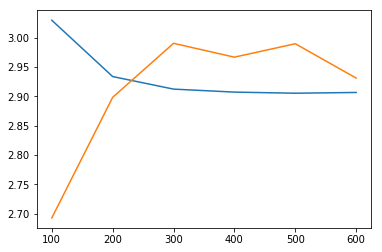

In [81]:
plt.plot([100,200,300,400,500,600],rmse_tst)
plt.plot([100,200,300,400,500,600],rmse_trn)

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.


#### Q2.1
Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

**HINT:** Use pandas.cut

This converts the given dataset  into a classification problem. Use this dataset with transformed 'heating load' to create a **logistic regression** classifiction model that predicts heating load type of a building. Split the data randomly into training and test set. Train the model on 80% of the data (80-20 split).


In [22]:
# your code
bins = pd.cut(data["Y1"], bins = [0 , 14 , 28 , np.inf ], labels = ['Low' , "Medium" , "High"])
bins

0      Medium
1      Medium
2      Medium
3      Medium
4      Medium
5      Medium
6      Medium
7      Medium
8      Medium
9      Medium
10     Medium
11     Medium
12     Medium
13     Medium
14     Medium
15     Medium
16       High
17       High
18       High
19       High
20     Medium
21     Medium
22     Medium
23     Medium
24        Low
25        Low
26        Low
27        Low
28        Low
29        Low
        ...  
738      High
739      High
740      High
741      High
742      High
743      High
744    Medium
745    Medium
746    Medium
747    Medium
748       Low
749       Low
750       Low
751       Low
752    Medium
753    Medium
754    Medium
755    Medium
756    Medium
757    Medium
758    Medium
759    Medium
760    Medium
761    Medium
762    Medium
763    Medium
764    Medium
765    Medium
766    Medium
767    Medium
Name: Y1, Length: 768, dtype: category
Categories (3, object): [Low < Medium < High]

In [23]:
data_dup = data
data_dup['Y1'] = bins
data_dup.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Medium
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Medium
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Medium
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Medium
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Medium


In [24]:
train,test = train_test_split( data_dup, test_size=0.2, random_state=100)

In [25]:
train_x = train.iloc[:,:-1]
train_y = train['Y1']
test_x = test.iloc[:,:-1]
test_y = test['Y1']

My_model = linear_model.LogisticRegression()
My_model.fit(train_x,train_y)

/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Q2.2 
- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


In [26]:
# your code
print("The training accuracy is")
My_model.score(train_x,train_y)

The training accuracy is


0.8078175895765473

In [27]:
print("The testing accuracy is")
My_model.score(test_x,test_y)

The testing accuracy is


0.7727272727272727

In [28]:
cm = metrics.confusion_matrix(My_model.predict(test_x), test_y)
cm                  

array([[55,  0, 25],
       [ 0, 42,  9],
       [ 0,  1, 22]])

In [29]:
print("The Precision score is ")
pred_x = My_model.predict(test_x)
metrics.precision_score(test_y, pred_x , average = None)

The Precision score is 


array([0.6875    , 0.82352941, 0.95652174])

In [31]:
print("The reacall score is ")
metrics.recall_score(test_y, pred_x , average = None)

The reacall score is 


array([1.        , 0.97674419, 0.39285714])

#### Q2.3
##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations
 
__Use 7-fold cross validation on the training data. Print the average accuracy__

In [42]:
# your code
from sklearn.model_selection import RepeatedKFold, KFold
acc = []
lrm = linear_model.LogisticRegression()
kf = KFold(n_splits=7)
x_k = data_dup.iloc[:,:-1]
y_k = data_dup['Y1']
for trn,tst in kf.split(x_k):
    x_train, x_test = x_k.iloc[trn],x_k.iloc[tst]
    y_train, y_test = y_k.iloc[trn],y_k.iloc[tst]
    lrm.fit(x_train,y_train)
    acc.append(lrm.score(x_test,y_test))
print("The average accuracy is:" , np.mean(acc))

The average accuracy is: 0.7016084832598596


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/lo

__Q2.4__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [49]:
# your code
from sklearn import preprocessing 
mnm = preprocessing.MinMaxScaler()
minmax = mnm.fit_transform(x_train)
test_minmax =  mnm.fit_transform(x_test)
logreg = linear_model.LogisticRegression().fit(minmax,y_train)

print("The new training accruacy is :" , logreg.score(minmax, y_train))

The new training accruacy is : 0.7936267071320182


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
